<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LISA Traffic Light Dataset**

In [3]:
import os
import pandas as pd
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim


In [26]:
import os

base_path = '/Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/'
filename = 'nightClip1--00433.jpg'
file_path = os.path.join(base_path, filename)


In [24]:
# تعديل وظيفة get_full_path للطباعة والتحقق من المسارات
def get_full_path(row):
    # إزالة جزء `nightTraining/` من `Filename` إذا كان موجودًا
    relative_path = row['Filename'].replace('nightTraining/', '')
    full_path = os.path.join(night_images_dir, relative_path)

    # طباعة المسار للتحقق من صحته
    print("Full Path: ", full_path)

    return full_path

# تحديث البيانات بالمسار الكامل
df1['Full_Path'] = df1.apply(get_full_path, axis=1)
df2['Full_Path'] = df2.apply(get_full_path, axis=1)

# عرض بعض البيانات للتحقق
print(df1[['Filename', 'Full_Path']].head())


Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00000.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00000.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00000.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00000.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00000.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00001.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00001.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00001.jpg
Full Path:  /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00001.jpg
Full Path:  /Users/mq/Downloads/archi

In [29]:
import os

if os.path.exists(file_path):
    # قم بفتح الملف ومعالجة البيانات
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}")


File not found: /Users/mq/Downloads/archive-7/sample-nightClip1/sample-nightClip1/frames/nightClip1--00433.jpg


In [39]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
image_folder_path = '/content/drive/My Drive/archive-7/'


In [43]:
import os

# تعديل المسار ليكون صحيحاً
image_folder_path = '/content/drive/My Drive/archive-7/sample-nightClip1/sample-nightClip1/frames/'

# عرض قائمة الملفات داخل المجلد
if os.path.exists(image_folder_path):
    image_files = os.listdir(image_folder_path)
    for file_name in image_files:
        print(file_name)
else:
    print("The path does not exist.")



nightClip1--00214.jpg
nightClip1--00200.jpg
nightClip1--00570.jpg
nightClip1--00016.jpg
nightClip1--00189.jpg
nightClip1--00162.jpg
nightClip1--00566.jpg
nightClip1--00572.jpg
nightClip1--00002.jpg
nightClip1--00228.jpg
nightClip1--00176.jpg
nightClip1--00361.jpg
nightClip1--00349.jpg
nightClip1--00412.jpg
nightClip1--00374.jpg
nightClip1--00406.jpg
nightClip1--00348.jpg
nightClip1--00407.jpg
nightClip1--00375.jpg
nightClip1--00360.jpg
nightClip1--00163.jpg
nightClip1--00177.jpg
nightClip1--00017.jpg
nightClip1--00413.jpg
nightClip1--00229.jpg
nightClip1--00003.jpg
nightClip1--00188.jpg
nightClip1--00215.jpg
nightClip1--00573.jpg
nightClip1--00201.jpg
nightClip1--00567.jpg
nightClip1--00372.jpg
nightClip1--00415.jpg
nightClip1--00367.jpg
nightClip1--00400.jpg
nightClip1--00373.jpg
nightClip1--00159.jpg
nightClip1--00005.jpg
nightClip1--00165.jpg
nightClip1--00011.jpg
nightClip1--00561.jpg
nightClip1--00401.jpg
nightClip1--00429.jpg
nightClip1--00171.jpg
nightClip1--00398.jpg
nightClip1

In [44]:
from PIL import Image

for image_name in image_files:
    image_path = os.path.join(image_folder_path, image_name)
    image = Image.open(image_path)
    #
    image.show()  #


In [47]:
num_classes = len([name for name in os.listdir(image_folder_path) if os.path.isdir(os.path.join(image_folder_path, name))])

print(f'Number of classes: {num_classes}')

Number of classes: 0


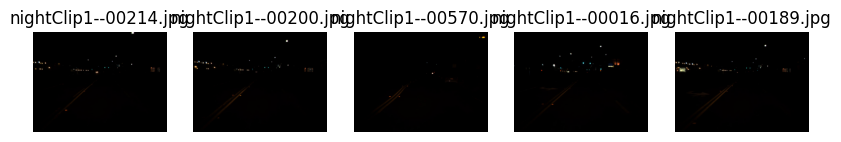

In [45]:
from PIL import Image
import matplotlib.pyplot as plt

def display_images(images_folder, image_files, num_images=5):
    plt.figure(figsize=(10, 10))
    for i, image_name in enumerate(image_files[:num_images]):
        image_path = os.path.join(images_folder, image_name)
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.show()

display_images(image_folder_path, image_files)


In [48]:
import pandas as pd


df_bulb = pd.read_csv('frameAnnotationsBULB.csv', delimiter=';')
df_box = pd.read_csv('frameAnnotationsBOX.csv', delimiter=';')


print("frameAnnotationsBULB.csv")
print(df_bulb.columns)
print(df_bulb.head())

print("\nframeAnnotationsBOX.csv")
print(df_box.columns)
print(df_box.head())

frameAnnotationsBULB.csv
Index(['Filename', 'Annotation tag', 'Upper left corner X',
       'Upper left corner Y', 'Lower right corner X', 'Lower right corner Y',
       'Origin file', 'Origin frame number', 'Origin track',
       'Origin track frame number'],
      dtype='object')
                              Filename Annotation tag  Upper left corner X  \
0  nightTraining/nightClip1--00000.jpg             go                  656   
1  nightTraining/nightClip1--00000.jpg             go                  715   
2  nightTraining/nightClip1--00000.jpg             go                  809   
3  nightTraining/nightClip1--00000.jpg             go                  691   
4  nightTraining/nightClip1--00000.jpg             go                  712   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  300                   667                   313   
1                  304                   727                   316   
2                  352                

In [49]:
# معرفة عدد الفئات الفريدة
num_classes_bulb = df_bulb['Annotation tag'].nunique()
num_classes_box = df_box['Annotation tag'].nunique()

print(f'Number of classes in frameAnnotationsBULB.csv: {num_classes_bulb}')
print(f'Number of classes in frameAnnotationsBOX.csv: {num_classes_box}')

# عرض أسماء الفئات الفريدة
print("Classes in frameAnnotationsBULB.csv:", df_bulb['Annotation tag'].unique())
print("Classes in frameAnnotationsBOX.csv:", df_box['Annotation tag'].unique())

Number of classes in frameAnnotationsBULB.csv: 1
Number of classes in frameAnnotationsBOX.csv: 1
Classes in frameAnnotationsBULB.csv: ['go']
Classes in frameAnnotationsBOX.csv: ['go']


In [54]:
import pandas as pd

# تأكد من تعديل هذا المسار إلى المسار الصحيح لملف CSV في Google Drive
csv_path = '/content/drive/My Drive/archive-7/sample-nightClip1/sample-nightClip1/frameAnnotationsBOX.csv'

# قراءة ملف CSV
df = pd.read_csv(csv_path, delimiter=';')

# عرض الأعمدة والصفوف الأولى للتحقق
print(df.columns)
print(df.head())


Index(['Filename', 'Annotation tag', 'Upper left corner X',
       'Upper left corner Y', 'Lower right corner X', 'Lower right corner Y',
       'Origin file', 'Origin frame number', 'Origin track',
       'Origin track frame number'],
      dtype='object')
                              Filename Annotation tag  Upper left corner X  \
0  nightTraining/nightClip1--00000.jpg             go                  650   
1  nightTraining/nightClip1--00000.jpg             go                  709   
2  nightTraining/nightClip1--00000.jpg             go                  803   
3  nightTraining/nightClip1--00000.jpg             go                  687   
4  nightTraining/nightClip1--00000.jpg             go                  708   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  280                   669                   319   
1                  286                   730                   322   
2                  332                   822                   

In [57]:
# إذا كان العمود Filename يحتوي على مسارات جزئية فقط، يمكنك تعديلها كالتالي:
df['Filename'] = df['Filename'].apply(lambda x: x.split('/')[-1])  # يحتفظ فقط باسم الملف


In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات مع زيادة البيانات
datagen = ImageDataGenerator(
    rescale=1./255,  # إعادة تحجيم الصور بحيث تكون القيم بين 0 و 1
    rotation_range=40,  # تدوير الصور بنسبة تصل إلى 40 درجة
    width_shift_range=0.2,  # إزاحة عرضية تصل إلى 20%
    height_shift_range=0.2,  # إزاحة طولية تصل إلى 20%
    shear_range=0.2,  # تغيير ميل الصورة
    zoom_range=0.2,  # تكبير أو تصغير الصورة بنسبة تصل إلى 20%
    horizontal_flip=True,  # عكس الصورة أفقيًا
    fill_mode='nearest',  # ملء الفراغات الناتجة عن التحويلات
    validation_split=0.2  # تخصيص 20% من البيانات للتحقق
)

# إنشاء مولد بيانات التدريب مع زيادة البيانات
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='/content/drive/My Drive/archive-7/sample-nightClip1/sample-nightClip1/frames/',
    x_col='Filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# إنشاء مولد بيانات التحقق بدون زيادة البيانات (للمقارنة)
validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='/content/drive/My Drive/archive-7/sample-nightClip1/sample-nightClip1/frames/',
    x_col='Filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1395 validated image filenames belonging to 2 classes.
Found 348 validated image filenames belonging to 2 classes.


In [84]:
for layer in base_model.layers[-8:]:  # إلغاء تجميد آخر 8 طبقات
    layer.trainable = True

In [88]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),  # إضافة BatchNormalization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # إضافة BatchNormalization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # إضافة BatchNormalization
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # إضافة Dropout لتقليل الإفراط في التكيّف
    layers.Dense(1, activation='sigmoid')  # التصنيف الثنائي
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 62, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 29, 29, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,584,833 (9.86 MB)

 Trainable params: 2,584,193 (9.86 MB)

 Non-trainable params: 640 (2.50 KB)

In [90]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=30  # يمكنك تعديل عدد العصور بناءً على احتياجاتك
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5138 - loss: 1.3461 - val_accuracy: 0.5094 - val_loss: 0.7096
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4688 - loss: 1.4607 - val_accuracy: 0.5357 - val_loss: 0.6984
Epoch 3/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43/43 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5530 - loss: 1.0754 - val_accuracy: 0.5250 - val_loss: 0.7278
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.3438 - loss: 1.7106 - val_accuracy: 0.3571 - val_loss: 0.8329
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4850 - loss: 1.1830 - val_accuracy: 0.5125 - val_loss: 0.7450
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4375 - loss: 1.2320 - val_accuracy: 0.5000 - val_loss: 0.7510
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5001 - loss: 1.0804 - val_accuracy: 0.5094 - val_loss: 0.8011
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5312 - loss: 0.8245 - val_accuracy: 0.5357 - val_loss: 0.7635
Epoch 9/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4843 - loss: 1.1459 - val_accuracy: 0.5156 - val_loss: 0.7792
Epoch 10/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5312 - loss: 0.9480 - val_accuracy: 0.4643 - val_loss: 0.8165


In [91]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 669ms/step - accuracy: 0.5001 - loss: 0.7246
Test accuracy: 0.48563218116760254


In [93]:
model.save('traffic_sign_model.h5')

In [106]:
from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np

# تثبيت Google Drive في Google Colab
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
from tensorflow.keras.preprocessing import image

# إنشاء صورة سوداء افتراضية بحجم 64x64 بكسل
img_array = np.zeros((64, 64, 3))
img_array = np.expand_dims(img_array, axis=0)

# توقع الفئة باستخدام النموذج المدرب
prediction = model.predict(img_array)
print(f'Probability of "go": {prediction[0][0]}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Probability of "go": 0.2809675335884094


In [111]:
# استخدام صورة من مولد البيانات للتدريب أو التحقق
for img_array, label in train_generator:
    prediction = model.predict(img_array)
    print(f'Probability of "go": {prediction[0][0]}')
    break  # استخدم أول مجموعة فقط للتجربة


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Probability of "go": 0.4150768518447876


In [112]:
threshold = 0.5
if prediction[0][0] > threshold:
    print("The image is classified as 'go'")
else:
    print("The image is classified as 'not go'")


The image is classified as 'not go'
